In [2]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from datetime import datetime


We start by opening the CSV file with pandas and filtering the fields that are relevant to our problem.

PS: This step has been done by me, but you can open the entire dataset and make your choice of fields that you find relevant or not.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
injury_dataset = pd.read_csv('/content/drive/MyDrive/Sports Data Campus/Final Project/tm_prediction_data.csv')

In [5]:
injury_dataset.head()

,player_index,player_url,player_name,injury_count_last_3_seasons,days_missed_last_3_seasons,injury_count_last_2_seasons,days_missed_last_2_seasons,injury_count_last_1_seasons,days_missed_last_1_seasons,muscular_injury_count_last_3_seasons,...,tendon_ligament_days_missed_last_1_seasons,days_missed_current_season,Height,Position_1,Position_2,Foot,X2ndclub,X3ndclub,Dateofdeath,Age
0,17,https://www.transfermarkt.com/rayan-ait-nouri/...,Rayan Aït-Nouri,3,35,1,6,0,0,0,...,0,0,1.80,Defender,Left-Back,left,NaN,NaN,NaN,24.0
1,18,https://www.transfermarkt.com/josh-wilson-esbr...,Josh Wilson-Esbrand,2,72,2,72,2,72,1,...,0,186,1.76,Defender,Left-Back,left,NaN,NaN,NaN,22.0
2,21,https://www.transfermarkt.com/issa-kabore/prof...,Issa Kaboré,1,5,1,5,0,0,0,...,0,5,1.80,Defender,Right-Back,right,NaN,NaN,NaN,24.0
3,23,https://www.transfermarkt.com/kalvin-phillips/...,Kalvin Phillips,2,178,1,75,0,0,1,...,0,171,1.79,Midfield,Defensive Midfield,right,NaN,NaN,NaN,29.0
4,25,https://www.transfermarkt.com/tijjani-reijnder...,Tijjani Reijnders,1,12,0,0,0,0,0,...,0,0,1.85,Midfield,Central Midfield,right,NaN,NaN,NaN,27.0


# Exploratory Data Analysis


---



In [6]:
pd.set_option('display.float_format', '{:.2f}'.format)
injury_dataset.describe()

,player_index,injury_count_last_3_seasons,days_missed_last_3_seasons,injury_count_last_2_seasons,days_missed_last_2_seasons,injury_count_last_1_seasons,days_missed_last_1_seasons,muscular_injury_count_last_3_seasons,muscular_days_missed_last_3_seasons,muscular_injury_count_last_2_seasons,...,skeletal_days_missed_last_1_seasons,tendon_ligament_injury_count_last_3_seasons,tendon_ligament_days_missed_last_3_seasons,tendon_ligament_injury_count_last_2_seasons,tendon_ligament_days_missed_last_2_seasons,tendon_ligament_injury_count_last_1_seasons,tendon_ligament_days_missed_last_1_seasons,days_missed_current_season,Height,Age
count,833.00,833.00,833.00,833.00,833.00,833.00,833.00,833.00,833.00,833.00,...,833.00,833.00,833.00,833.00,833.00,833.00,833.00,833.00,833.00,831.00
mean,982.00,3.23,107.26,2.20,79.64,1.19,42.18,1.05,31.96,0.74,...,12.55,0.22,21.82,0.17,17.44,0.08,8.82,43.91,1.83,26.01
std,579.30,3.04,116.90,2.17,99.50,1.29,66.29,1.50,61.13,1.15,...,34.96,0.49,70.47,0.43,62.41,0.28,44.00,62.05,0.06,4.58
min,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.63,16.00
25%,460.00,1.00,18.00,1.00,5.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.78,22.50
50%,977.00,2.00,69.00,1.00,45.00,1.00,14.00,1.00,4.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.00,1.84,26.00
75%,1448.00,5.00,159.00,3.00,113.00,2.00,58.00,1.00,41.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,62.00,1.88,29.00
max,2068.00,18.00,709.00,12.00,648.00,7.00,435.00,12.00,532.00,8.00,...,286.00,3.00,559.00,2.00,559.00,2.00,407.00,502.00,2.04,41.00


In [7]:
cols_to_drop = ['player_index', 'player_url', 'X2ndclub', 'X3ndclub', 'Dateofdeath']

injury_dataset = injury_dataset.drop(columns=cols_to_drop)

print(injury_dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 31 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   player_name                                  833 non-null    object 
 1   injury_count_last_3_seasons                  833 non-null    int64  
 2   days_missed_last_3_seasons                   833 non-null    int64  
 3   injury_count_last_2_seasons                  833 non-null    int64  
 4   days_missed_last_2_seasons                   833 non-null    int64  
 5   injury_count_last_1_seasons                  833 non-null    int64  
 6   days_missed_last_1_seasons                   833 non-null    int64  
 7   muscular_injury_count_last_3_seasons         833 non-null    int64  
 8   muscular_days_missed_last_3_seasons          833 non-null    int64  
 9   muscular_injury_count_last_2_seasons         833 non-null    int64  
 10  mu

In [8]:
# Columns to keep
keep_cols = ['injury_count_last_3_seasons', 'days_missed_last_3_seasons']

# Drop all other injury_count / days_missed columns
cols_to_drop = [col for col in injury_dataset.columns
                if ('injury_count' in col or 'days_missed' in col)
                   and col not in keep_cols]

injury_dataset_pairplot = injury_dataset.drop(columns=cols_to_drop)

# Check
print(injury_dataset_pairplot.columns)


Index(['player_name', 'injury_count_last_3_seasons',
       'days_missed_last_3_seasons', 'Height', 'Position_1', 'Position_2',
       'Foot', 'Age'],
      dtype='object')


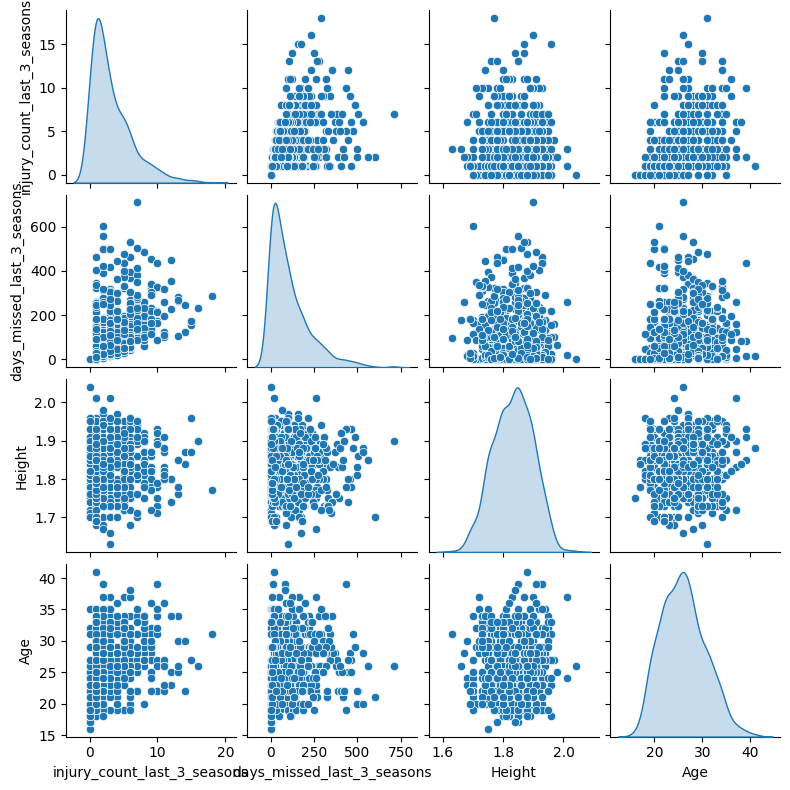

In [9]:

import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(injury_dataset_pairplot,
             height=2,
             diag_kind='kde')

plt.show()


# Training, Testing, and Model Creation

---



In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Example thresholds
bins = [0, 15, 60, float('inf')]
labels = ['Low', 'Medium', 'High']

# Create risk_category column
injury_dataset['risk_category'] = pd.cut(
    injury_dataset['days_missed_current_season'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Save player names separately
player_names = injury_dataset["player_name"]

# Features & target
X = injury_dataset.drop(columns=['days_missed_current_season', 'risk_category', 'player_name'])

y = injury_dataset['risk_category']

# One-hot encode features
X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

# Align player names with test indices
player_test_ids = player_names.iloc[y_test.index]

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Results with player names
results = pd.DataFrame({
    "player_name": player_test_ids.values,
    "actual": y_test.values,
    "predicted": y_pred
})

print(results.head(10))


          player_name  actual predicted
0      Danilo Cataldi    High       Low
1           Raúl Moro  Medium    Medium
2         Enzo Tchato  Medium    Medium
3       Omar Alderete     Low       Low
4        Adam Lallana  Medium    Medium
5  Leandro Chichizola     Low       Low
6          Kike Pérez     Low       Low
7    Dejan Kulusevski  Medium    Medium
8           Paul Joly  Medium    Medium
9        Mats Hummels     Low       Low


In [17]:
X.head()

,injury_count_last_3_seasons,days_missed_last_3_seasons,injury_count_last_2_seasons,days_missed_last_2_seasons,injury_count_last_1_seasons,days_missed_last_1_seasons,muscular_injury_count_last_3_seasons,muscular_days_missed_last_3_seasons,muscular_injury_count_last_2_seasons,muscular_days_missed_last_2_seasons,...,Position_2_Goalkeeper,Position_2_Left Midfield,Position_2_Left Winger,Position_2_Left-Back,Position_2_Right Midfield,Position_2_Right Winger,Position_2_Right-Back,Position_2_Second Striker,Foot_left,Foot_right
0,3,35,1,6,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,True,False
1,2,72,2,72,2,72,1,31,1,31,...,False,False,False,True,False,False,False,False,True,False
2,1,5,1,5,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,True
3,2,178,1,75,0,0,1,103,0,0,...,False,False,False,False,False,False,False,False,False,True
4,1,12,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True


In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       0.64      0.63      0.63        59
         Low       0.75      0.82      0.78       119
      Medium       0.72      0.61      0.66        72

    accuracy                           0.72       250
   macro avg       0.70      0.69      0.69       250
weighted avg       0.71      0.72      0.71       250



In [13]:
import pandas as pd

# Get feature importances
importances = model.feature_importances_

# Put into a dataframe for clarity
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importances)


                                        feature  importance
25                                          Age        0.10
24                                       Height        0.10
1                    days_missed_last_3_seasons        0.08
3                    days_missed_last_2_seasons        0.06
0                   injury_count_last_3_seasons        0.05
5                    days_missed_last_1_seasons        0.05
7           muscular_days_missed_last_3_seasons        0.04
2                   injury_count_last_2_seasons        0.04
9           muscular_days_missed_last_2_seasons        0.03
13          skeletal_days_missed_last_3_seasons        0.03
15          skeletal_days_missed_last_2_seasons        0.03
11          muscular_days_missed_last_1_seasons        0.02
4                   injury_count_last_1_seasons        0.02
19   tendon_ligament_days_missed_last_3_seasons        0.02
42                                   Foot_right        0.02
6          muscular_injury_count_last_3_

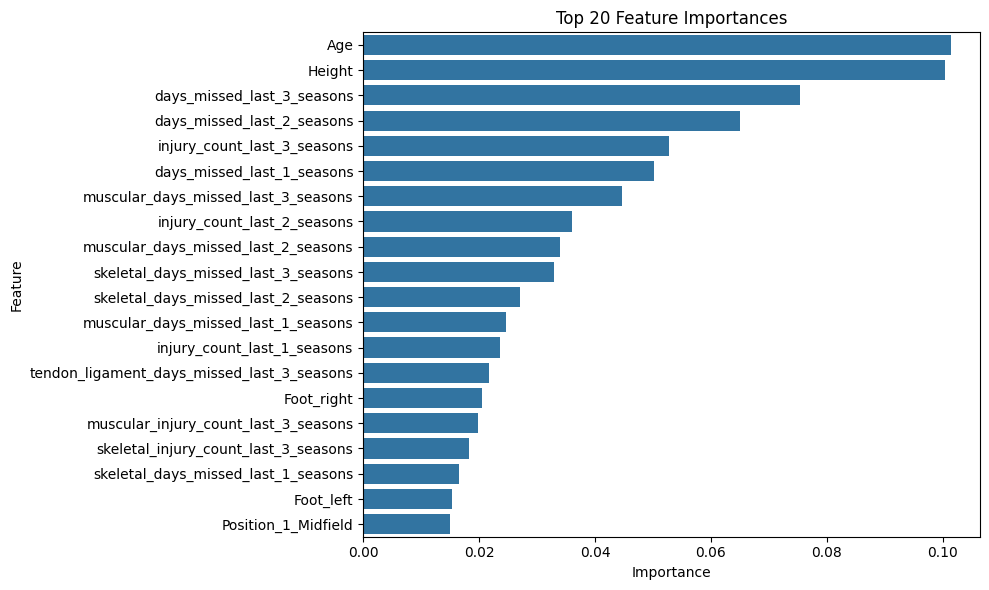

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppose your trained model is called `model` and features are in X
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(20))
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


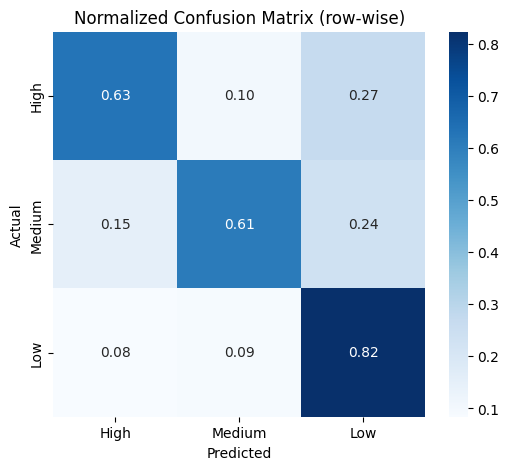

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['High', 'Medium', 'Low'])

# Normalize by row (actual class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Convert to DataFrame for plotting
cm_df = pd.DataFrame(cm_normalized, index=['High', 'Medium', 'Low'], columns=['High', 'Medium', 'Low'])

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, fmt='.2f', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Normalized Confusion Matrix (row-wise)')
plt.show()




In [16]:
import pandas as pd

# Suppose isak_data is your dictionary
isak_data = {
    "injury_count_last_3_seasons": [6],
    "days_missed_last_3_seasons": [206],
    "injury_count_last_2_seasons": [5],
    "days_missed_last_2_seasons": [99],
    "injury_count_last_1_seasons": [3],
    "days_missed_last_1_seasons": [43],
    "muscular_injury_count_last_3_seasons": [5],
    "muscular_days_missed_last_3_seasons": [172],
    "muscular_injury_count_last_2_seasons": [4],
    "muscular_days_missed_last_2_seasons": [65],
    "muscular_injury_count_last_1_seasons": [2],
    "muscular_days_missed_last_1_seasons": [9],
    "skeletal_injury_count_last_3_seasons": [1],
    "skeletal_days_missed_last_3_seasons": [34],
    "skeletal_injury_count_last_2_seasons": [1],
    "skeletal_days_missed_last_2_seasons": [34],
    "skeletal_injury_count_last_1_seasons": [1],
    "skeletal_days_missed_last_1_seasons": [34],
    "tendon_ligament_injury_count_last_3_seasons": [0],
    "tendon_ligament_days_missed_last_3_seasons": [0],
    "tendon_ligament_injury_count_last_2_seasons": [0],
    "tendon_ligament_days_missed_last_2_seasons": [0],
    "tendon_ligament_injury_count_last_1_seasons": [0],
    "tendon_ligament_days_missed_last_1_seasons": [0],
    "Height": [1.92],
    "Age": [25],
    "Position_1_Defender": [0],
    "Position_1_Goalkeeper": [0],
    "Position_1_Midfield": [0],
    "Position_2_Central Midfield": [0],
    "Position_2_Centre-Back": [0],
    "Position_2_Centre-Forward": [1],
    "Position_2_Defensive Midfield": [0],
    "Position_2_Goalkeeper": [0],
    "Position_2_Left Midfield": [0],
    "Position_2_Left Winger": [0],
    "Position_2_Left-Back": [0],
    "Position_2_Right Midfield": [0],
    "Position_2_Right Winger": [0],
    "Position_2_Right-Back": [0],
    "Position_2_Second Striker": [0],
    "Foot_left": [0],
    "Foot_right": [1]
}

# Convert dictionary to DataFrame
isak_df = pd.DataFrame(isak_data)

# Ensure columns match the model's training data
missing_cols = set(X.columns) - set(isak_df.columns)
for col in missing_cols:
    isak_df[col] = 0  # add missing columns if any

# Reorder columns to match training features
isak_df = isak_df[X.columns]

# Predict risk category
predicted_risk = model.predict(isak_df)

print(f"Predicted risk category for {isak_df.get('player_name', ['Alexander Isak'])[0]}: {predicted_risk[0]}")


Predicted risk category for Alexander Isak: High
